['C:\\DATA\\eLEAF\\WaPOR\\Gezira\\TEST\\AETI\\L3_GEZ_AETI_2001.tif', 'C:\\DATA\\eLEAF\\WaPOR\\Gezira\\TEST\\AETI\\L3_GEZ_AETI_2002.tif', 'C:\\DATA\\eLEAF\\WaPOR\\Gezira\\TEST\\AETI\\L3_GEZ_AETI_2003.tif', 'C:\\DATA\\eLEAF\\WaPOR\\Gezira\\TEST\\AETI\\L3_GEZ_AETI_2015.tif']


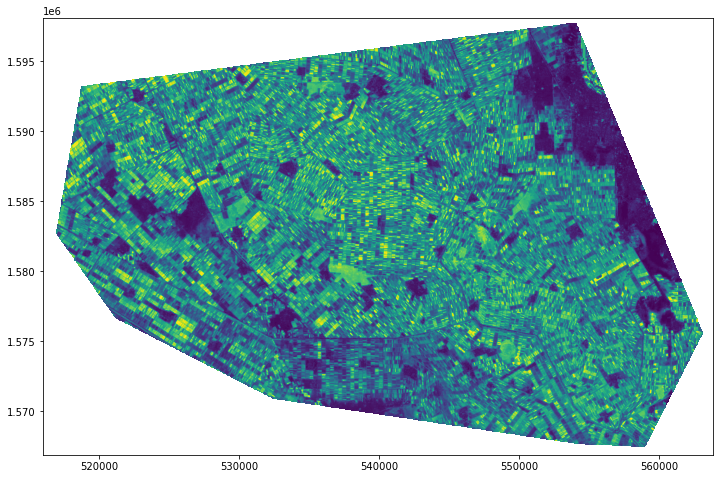

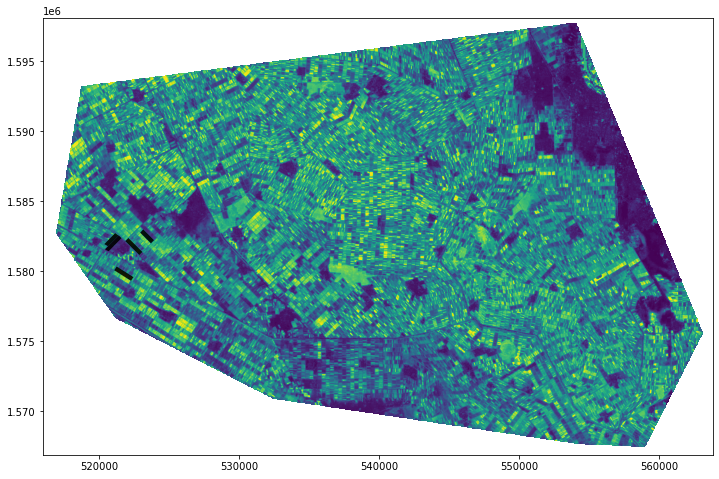

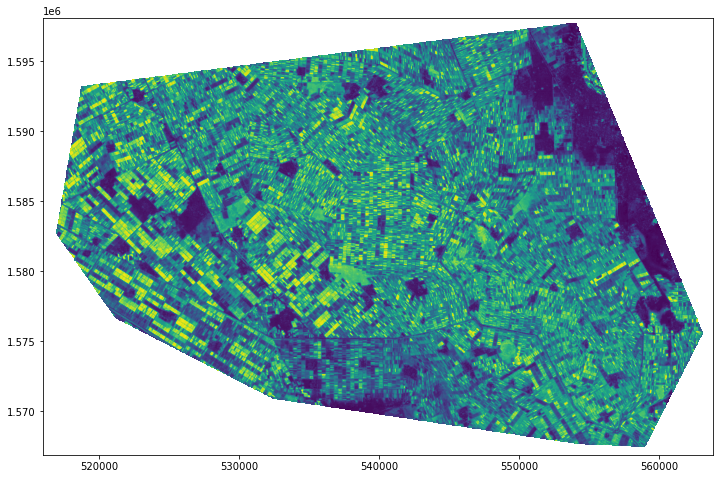

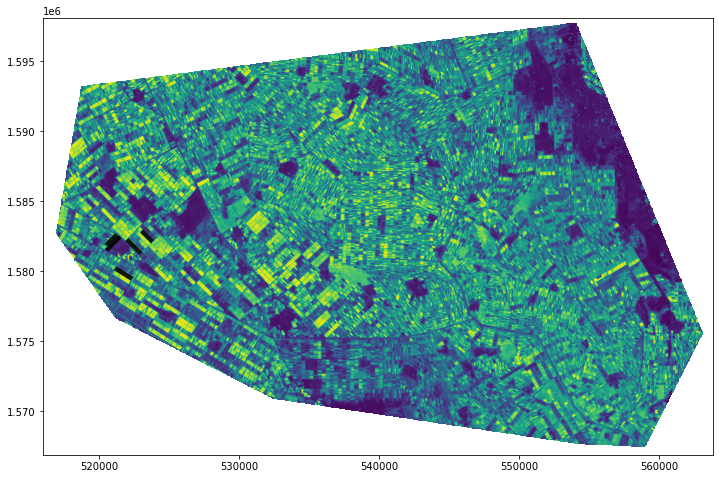

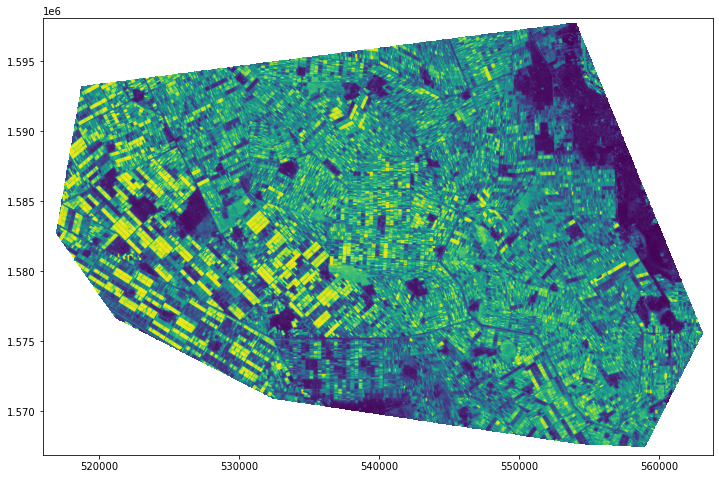

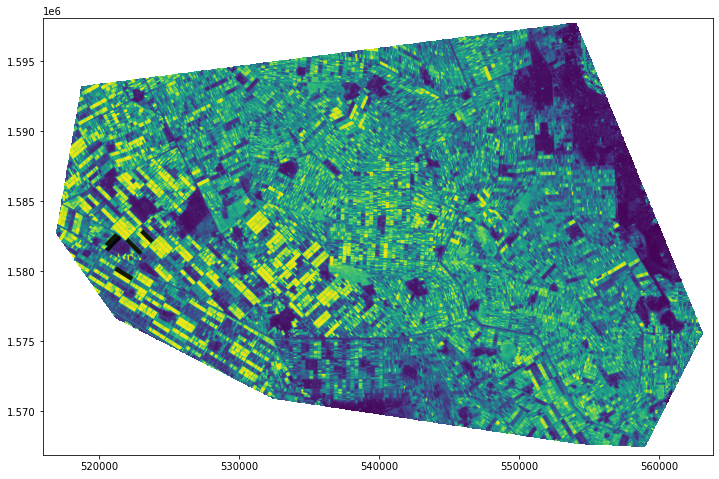

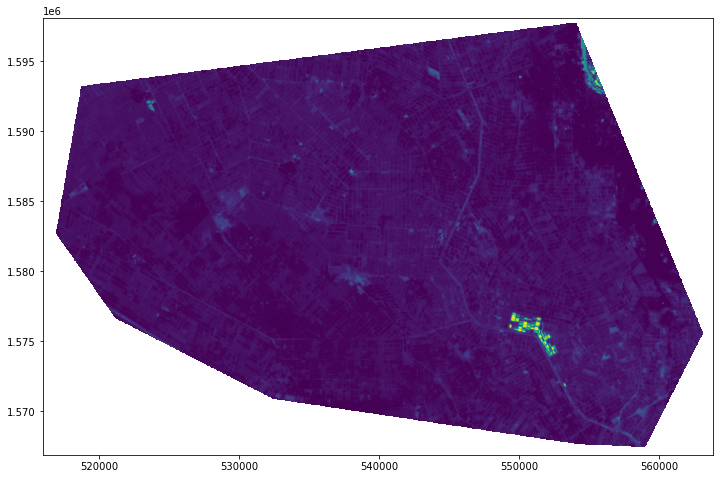

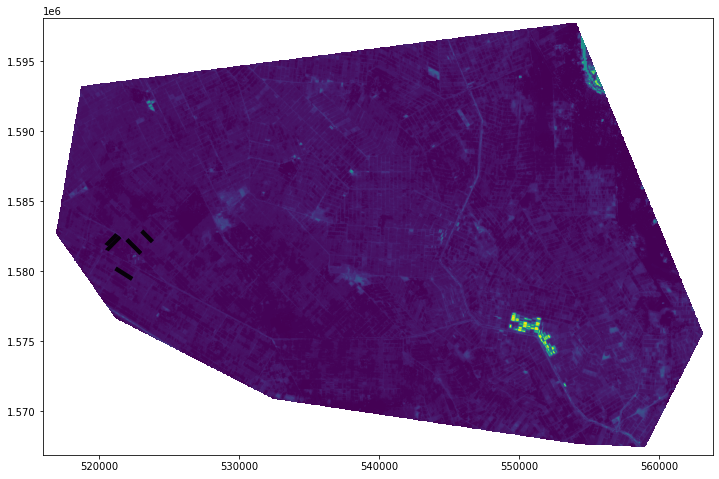

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt
import shapely
import os
import glob


#inraster_path = 'C:\\Users\\MahanP\\Desktop\\BRZ-tmin\\tmin\\rep'
inraster_path = 'C:\DATA\eLEAF\WaPOR\Gezira\TEST\AETI'
districts = gpd.read_file(r"C:\Users\Safi\Desktop\newshape\districts.shp")
#districts = districts[["id", "Name",]]
districts.head()

# Make a search criteria to select the raster files
search_criteria = "*.tif"
inraster = os.path.join(inraster_path, search_criteria)
#print(inraster)

# glob function can be used to list files from a directory with specific criteria
zonal_fps = glob.glob(inraster)

# Files that were found:
print(zonal_fps)


# Iterate over raster files and add them to source -list in 'read mode'
for fp in zonal_fps:
    band1 = rio.open(fp)
    band1.height
    band1.width

    districts1 = districts
    districts1.head()

    fig, ax = plt.subplots(1, figsize=(12, 10))
    show(band1, ax=ax)
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 10))
    show(band1, ax=ax)
    districts1.plot(ax=ax, color="black", alpha=.90)
    plt.show()

    def derive_stats(geom, data, **mask_kw):
     masked, mask_transform = mask(dataset=data, shapes=(geom,),
                                  crop=True, all_touched=True, filled=True)
     return masked

    districts1['max'] = districts1.geometry.apply(derive_stats, args=(band1, )).apply(np.max)
    districts1.head()